## Uygulamalı Veri Bilimi ve Makine Öğrenimi Eğitim Kampı 

### Kodluyoruz Ağustos-Eylül 2019 Ankara

### 2. hafta

Geçtiğimiz hafta istatistik temellerine değindik

Anahtar kelimeler:
* Z Table
* Normal dağılım (Gaussian) (çan)
* Uniform dağılım
* Poisson dağılımı
* Probability Density Function (PDF)
* Cumulative Distribution Function (CDF)


## IRIS dataseti

### Imports

In [1]:
import statsmodels.stats.api as sms # İstatistik Kütüphanesi
import os # Operating system kütüphanesi, çalıştığımız directory'yi değiştiririz
import pandas as pd # Dataframe adında python'un özel tablo kütüphanesi
import seaborn as sns
from sklearn import datasets #Sckit-Learning kütüphanesindeki hazır 'toy' datasetler
import matplotlib.pyplot as plt # Plot etmek için bu şekilde çağırıyoruz
import numpy as np

In [2]:
#os.chdir(r"C:\Users\neutr\Desktop\kodluyoruz bootcamp") #directory değiştirebiliyoruz ama şimdilik gerek yok
iris = sns.load_dataset("iris") #hazır datasetini yüklüyoruz

In [3]:
iris.head() # verisetinin ilk 5 terimi ve headerların ismine bakıyoruz (pandas dataframe özelliği)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'sepal width (cm)')

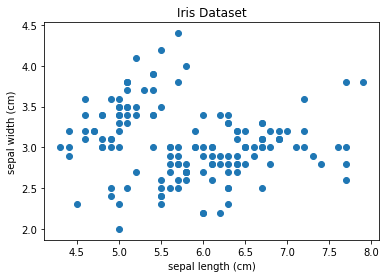

In [4]:
fig, ax = plt.subplots() #figür oluşturuyoruz
ax.scatter(iris['sepal_length'],iris['sepal_width']) # scatter plot yaptırarak yaprak uzunluğu ve genişliğini alıyoruz
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [5]:
colors={'setosa' : 'r', 'versicolor' : 'g', 'virginica' : 'b'}


Text(0, 0.5, 'sepal width (cm)')

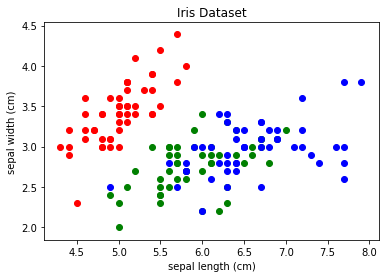

In [6]:
fig, ax = plt.subplots() #Diğer figür 3 türe de hakim ancak tek renk var, çiçeklerin rengine göre plot edelim
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i],iris['sepal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

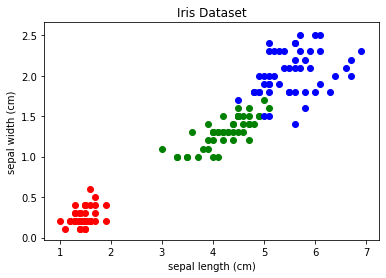

In [7]:
fig, ax = plt.subplots()
for i in range(len(iris['petal_length'])):
    ax.scatter(iris['petal_length'][i],iris['petal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [8]:
columns = iris.columns.drop(['species'])

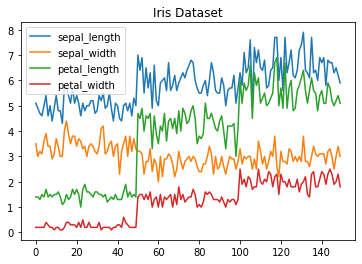

In [9]:
x_data = range (0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend(columns)


In [10]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0, 0.5, 'Count')

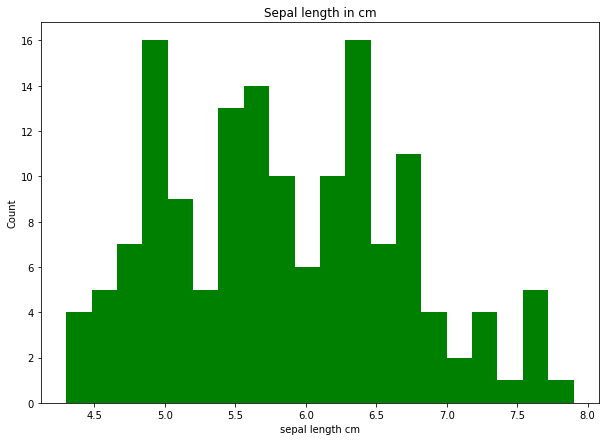

In [11]:
plt.figure(figsize=(10,7))
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

In [12]:
test_array=[3,5,7,8,9,10,11,13,124]
print("mean: " + str(np.mean(test_array)))
print("median: " + str(np.median(test_array)))
#median outlierlara karşı daha robust, mean outlier durumlarına karşı hassas

mean: 21.11111111111111
median: 9.0


In [13]:
# Quetile bulmak:
# elimizdeki veriyi 4 çeyreğe bölüyoruz
test_array=[3,5,7,8,9,10,11,13,124,35,36,23,21,12,13,14,15,60,32,34,1,3,5,8,6,7]

In [14]:
print("1. Quertile %25: " + str(np.percentile(q=25, a=test_array))) 
print("2. Quertile %50: " + str(np.percentile(q=50, a=test_array))) 
print("3. Quertile %75: " + str(np.percentile(q=75, a=test_array))) 
print("4. Quertile %100: " + str(np.percentile(q=100, a=test_array)))
Q3=np.percentile(q=75, a=test_array)
Q1=np.percentile(q=25, a=test_array)
IQR=Q3-Q1
print("IQR (Inter Quertile Range) : " + str(IQR))
outlier=[]
outlier_min=Q1-1.5*IQR
outlier_max=Q3+1.5*IQR
for i in test_array:
    if i<outlier_min or i>outlier_max:
        outlier.append(i)
print("Bu sayıdan küçükse outlier diyebiliriz: " +str(outlier_min))
print("Bu sayıdan büyükse outlier diyebiliriz: " +str(outlier_max))
print(outlier)

1. Quertile %25: 7.0
2. Quertile %50: 11.5
3. Quertile %75: 22.5
4. Quertile %100: 124.0
IQR (Inter Quertile Range) : 15.5
Bu sayıdan küçükse outlier diyebiliriz: -16.25
Bu sayıdan büyükse outlier diyebiliriz: 45.75
[124, 60]


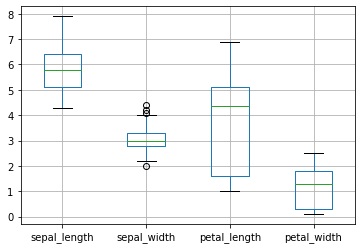

In [15]:
plt.figure()
iris.boxplot()

Text(0, 0.5, 'Count')

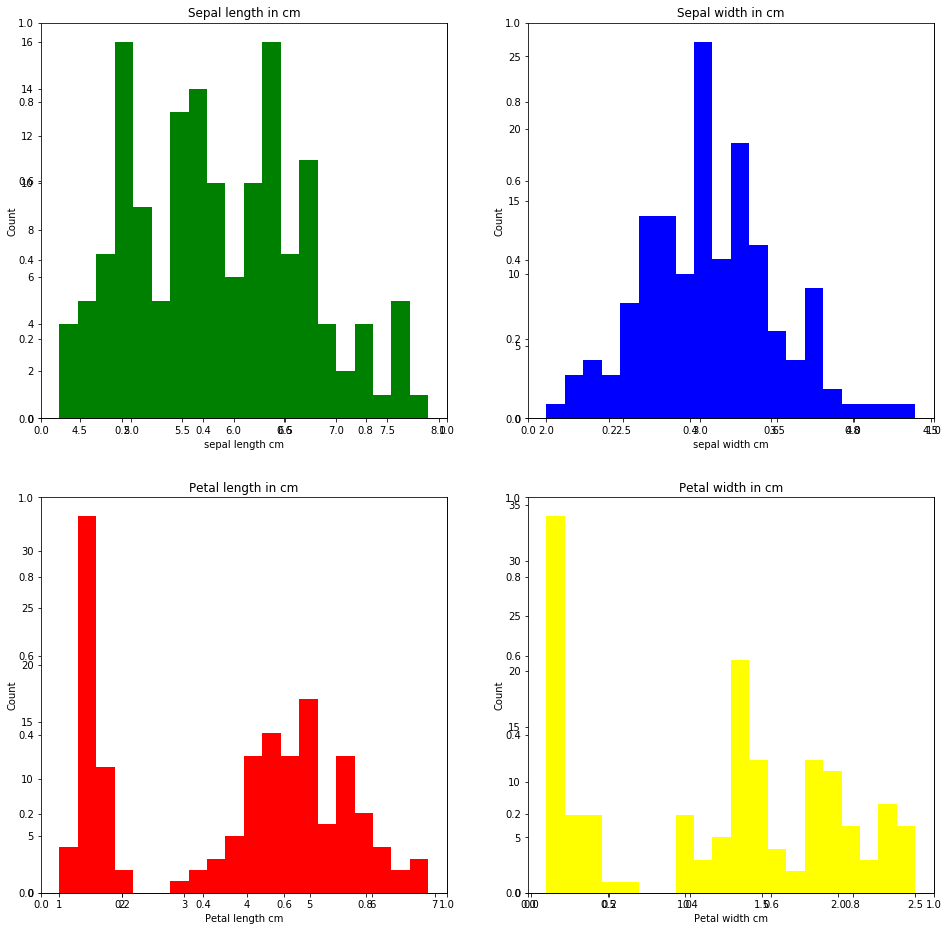

In [16]:
f, axs = plt.subplots(2,2,figsize=(16,16))

ax = f.add_subplot(221)
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(222)
plt.hist(iris['sepal_width'],bins=20, color='blue')
plt.title("Sepal width in cm")
plt.xlabel("sepal width cm")
plt.ylabel("Count")

ax2 = f.add_subplot(223)
plt.hist(iris['petal_length'],bins=20, color='red')
plt.title("Petal length in cm")
plt.xlabel("Petal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(224)
plt.hist(iris['petal_width'],bins=20, color='yellow')
plt.title("Petal width in cm")
plt.xlabel("Petal width cm")
plt.ylabel("Count")

In [17]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [18]:
iris_corr=iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


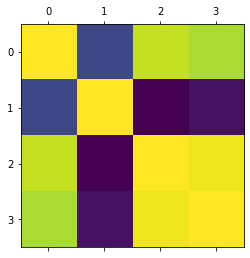

In [19]:
plt.matshow(iris_corr)
plt.show()

In [20]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


# Titanic Veriseti

In [21]:
import os
os.chdir(r"C:\Users\neutr\Desktop\kodluyoruz bootcamp") #verisetini nereye indirdiyeseniz adresi giriniz

In [22]:
titanic=pd.read_csv('titanic_train.csv')
#data=pd.read_csv('https://raw.githubusercontent.com/caglarmert/UVBMOB/master/titanic_train.csv') # veriseti yoksa internetten çekmek için


In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
survived_gender=pd.crosstab(index=titanic['Survived'],columns=titanic['Sex'])
survived_gender.index = ["died","survived"]
survived_gender

Sex,female,male
died,81,468
survived,233,109


In [25]:
survived_class=pd.crosstab(index=titanic['Survived'],columns=titanic['Pclass'])
survived_class.index = ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


In [26]:
char_cabin = titanic["Cabin"].astype(str)

In [27]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin])
titanic["Cabin"] = pd.Categorical(new_Cabin)

In [28]:
titanic["Cabin"]

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: category
Categories (9, object): [A, B, C, D, ..., F, G, T, n]

In [29]:
survived_count=pd.crosstab(index=titanic['Survived'],columns=titanic['Cabin'])
survived_count.index = ["died","survived"]
survived_count

Cabin,A,B,C,D,E,F,G,T,n
died,8,12,24,8,8,5,2,1,481
survived,7,35,35,25,24,8,2,0,206


In [30]:
survived_class=pd.crosstab(index=titanic['Survived'],
                           columns=titanic['Pclass'],
                          margins=True)
survived_class.columns = ["Class1","Class2","Class3","Row_Total"]
survived_class.index = ["Died","Survived","Column_Total"]
survived_class

,Class1,Class2,Class3,Row_Total
Died,80,97,372,549
Survived,136,87,119,342
Column_Total,216,184,491,891


In [31]:
survived_class/survived_class.loc["Column_Total","Row_Total"]

,Class1,Class2,Class3,Row_Total
Died,0.089787,0.108866,0.417508,0.616162
Survived,0.152637,0.097643,0.133558,0.383838
Column_Total,0.242424,0.206510,0.551066,1.000000


In [32]:
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}
df=pd.DataFrame(d)


In [33]:
print(df.count())


Name      12
Age       12
Rating    12
dtype: int64


In [34]:
print(df.sum())


Name      TomJamesRickyVinSteveSmithJackLeeDavidGasperBe...
Age                                                     382
Rating                                                44.92
dtype: object


In [35]:
print(df.mean())


Age       31.833333
Rating     3.743333
dtype: float64


In [36]:
print(df.median())


Age       29.50
Rating     3.79
dtype: float64


In [37]:
print(df.mode())


      Name   Age  Rating
0   Andres  23.0    2.56
1   Betina  25.0    2.98
2    David  30.0    3.20
3   Gasper   NaN    3.24
4     Jack   NaN    3.65
5    James   NaN    3.78
6      Lee   NaN    3.80
7    Ricky   NaN    3.98
8    Smith   NaN    4.10
9    Steve   NaN    4.23
10     Tom   NaN    4.60
11     Vin   NaN    4.80


In [38]:
print(df.std())


Age       9.232682
Rating    0.661628
dtype: float64


In [39]:
print(df.min())


Name      Andres
Age           23
Rating      2.56
dtype: object


In [40]:
print(df.max())

Name      Vin
Age        51
Rating    4.8
dtype: object


In [41]:
print(df.describe(include='all'))

          Name        Age     Rating
count       12  12.000000  12.000000
unique      12        NaN        NaN
top     Gasper        NaN        NaN
freq         1        NaN        NaN
mean       NaN  31.833333   3.743333
std        NaN   9.232682   0.661628
min        NaN  23.000000   2.560000
25%        NaN  25.000000   3.230000
50%        NaN  29.500000   3.790000
75%        NaN  35.500000   4.132500
max        NaN  51.000000   4.800000


In [42]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

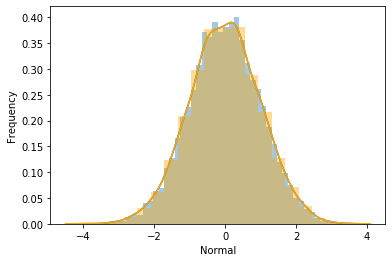

In [43]:
veri_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(veri_normal)
ax = sns.distplot(veri_normal, bins=20, kde=True, color= "orange")

ax.set(xlabel='Normal', ylabel='Frequency')

In [44]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
               157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
               203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
       216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

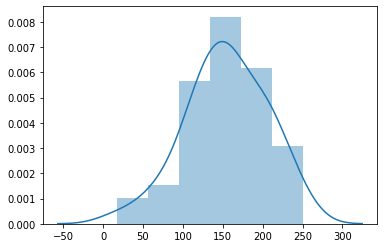

In [45]:
sns.distplot(olcumler)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

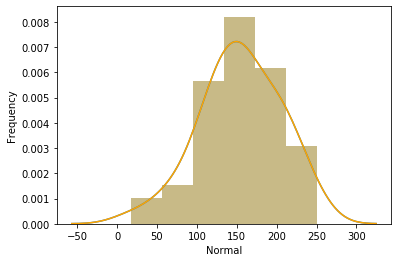

In [46]:
ax = sns.distplot(olcumler)
ax = sns.distplot(olcumler, bins=6, kde=True, color= "orange")

ax.set(xlabel='Normal', ylabel='Frequency')

In [47]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

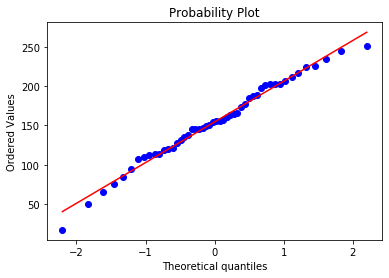

In [48]:
import pylab
stats.probplot(olcumler, dist='norm', plot=pylab)
pylab.show()

In [49]:
import statsmodels.api as sm


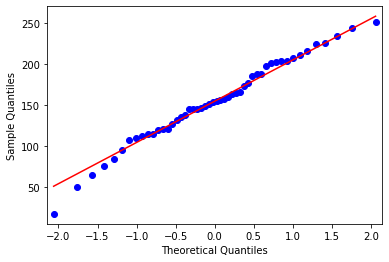

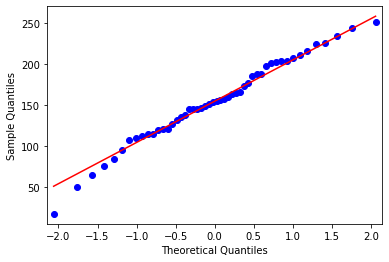

In [50]:
sm.qqplot(olcumler, line ='s')

In [51]:
from scipy.stats import shapiro
stat, p = shapiro(olcumler)

print('Statistics = %.3f, p = %.3f' % (stat,p))

Statistics = 0.985, p = 0.785


## ----------------------------

In [52]:
len(olcumler)

50

In [53]:
stats.ttest_1samp(olcumler,popmean=170)


Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [54]:
stats.t.ppf(q=0.025,df=len(olcumler)-1)


-2.0095752344892093

In [55]:
stats.t.cdf(x=-2.0095752344892093, df=len(olcumler)-1)

0.025000000144692665

In [56]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
  
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [57]:
GRUP_A= np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:]="A"
A = pd.concat([A, GRUP_A], axis =1)
A.columns=['GELIR', 'GRUP']
A.head()

,GELIR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [58]:
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:]="B"
B = pd.concat([B, GRUP_B], axis=1)
B.columns=['GELIR', 'GRUP']
B.head()

,GELIR,GRUP
0,37,B
1,39,B
2,31,B
3,31,B
4,34,B


In [59]:
AB = pd.concat([A,B])
AB.columns=['GELIR', 'GRUP']
AB.head()

,GELIR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


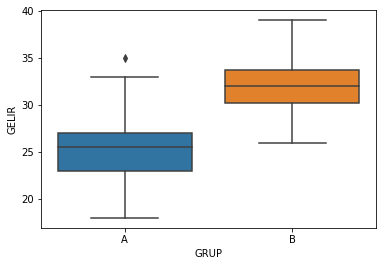

In [60]:
import seaborn as sns
sns.boxplot(x= "GRUP", y="GELIR",data=AB)

In [61]:
from scipy.stats import shapiro
shapiro(AB.GELIR)

(0.9816120862960815, 0.5004147291183472)

In [62]:
shapiro(B.GELIR)

(0.9561261534690857, 0.2458445429801941)

In [63]:
shapiro(A.GELIR)

(0.9789242148399353, 0.7962799668312073)

In [64]:
from scipy.stats import levene
levene(A.iloc[:,0], B.iloc[:,0]) #equal variance test

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [65]:
from scipy import stats
stats.ttest_ind(A.iloc[:,0], B.iloc[:,0],equal_var=True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [66]:
#Bağımlı iki örneklem

oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,
                       115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134
                        ,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [67]:
birlikte= pd.concat([oncesi,sonrasi],axis=1)
birlikte.columns=["öncesi","sonrası"]
birlikte.head()

,öncesi,sonrası
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [68]:
grup_oncesi=np.arange(len(oncesi))
grup_oncesi=pd.DataFrame(grup_oncesi)
grup_oncesi[:]="ONCESI"
A=pd.concat([oncesi,grup_oncesi],axis=1)
A.columns=["skor","grup"]

grup_sonrasi=np.arange(len(sonrasi))
grup_sonrasi=pd.DataFrame(grup_sonrasi)
grup_sonrasi[:]="SONRASI"
B=pd.concat([sonrasi,grup_sonrasi],axis=1)
B.columns=["skor","grup"]

In [69]:
A.head()

,skor,grup
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI


In [70]:
B.head()

,skor,grup
0,118,SONRASI
1,127,SONRASI
2,122,SONRASI
3,132,SONRASI
4,129,SONRASI


In [71]:
AB= pd.concat([A,B])
AB.columns=["skor","grup"]
AB.head()

,skor,grup
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI


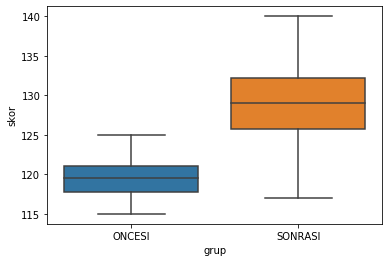

In [72]:
sns.boxplot(x= "grup", y="skor",data=AB)




In [73]:
levene(A.iloc[:,0], B.iloc[:,0]) #equal variance test



LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [74]:

stats.ttest_ind(A.iloc[:,0], B.iloc[:,0],equal_var=True)

Ttest_indResult(statistic=-9.55717332610074, pvalue=8.997873209476945e-15)

In [75]:
shapiro(A.iloc[:,0])

(0.9543654918670654, 0.10722342133522034)

In [76]:
shapiro(B.iloc[:,0])

(0.9780087471008301, 0.6159457564353943)

In [77]:
stat, p = shapiro(A.iloc[:,0])
print('Alanı Veren Nokta = %.3f, p = %.3f' % (stat,p))

#interpret

alpha=0.05
if p> alpha:
    print(" Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)")
else:
    print(" Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) ")

Alanı Veren Nokta = 0.954, p = 0.107
 Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)


In [78]:
stats.ttest_rel(A.iloc[:,0], B.iloc[:,0])

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

### ANOVA

In [79]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])
dfs=[A,B,C]

In [80]:
ABC= pd.concat(dfs, axis =1)
ABC.columns = ["A","B","C"]
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [81]:
ABC

,A,B,C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42
5,29,32,43
6,27,34,38
7,31,27,35
8,30,36,39
9,32,30,39


In [82]:
for i in range(len(ABC.columns)):

    stat, p = shapiro(ABC.iloc[:,i])
    print(str(ABC.columns[i])+" için: ")
    print('Alanı Veren Nokta = %.3f, p = %.3f' % (stat,p))

    #interpret

    alpha=0.05
    if p> alpha:
        print(" Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)")
    else:
        print(" Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) ")

A için: 
Alanı Veren Nokta = 0.970, p = 0.532
 Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)
B için: 
Alanı Veren Nokta = 0.979, p = 0.798
 Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)
C için: 
Alanı Veren Nokta = 0.958, p = 0.274
 Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)


In [83]:
stat, p = levene(ABC.iloc[:,0],ABC.iloc[:,1],ABC.iloc[:,2])
print(str(ABC.columns[i])+" için: ")
print('Alanı Veren Nokta = %.3f, p = %.3f' % (stat,p))

#interpret

alpha=0.05
if p> alpha:
    print(" Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)")
else:
    print(" Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) ")


C için: 
Alanı Veren Nokta = 1.027, p = 0.362
 Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)


In [84]:
from scipy.stats import f_oneway

In [85]:
f_oneway(ABC['A'],ABC['B'],ABC['C'])

F_onewayResult(statistic=74.69278140730431, pvalue=1.307905074681148e-19)

### IRIS dataset

In [86]:
import statsmodels.stats.api as sms # İstatistik Kütüphanesi
import os # Operating system kütüphanesi, çalıştığımız directory'yi değiştiririz
import pandas as pd # Dataframe adında python'un özel tablo kütüphanesi
import seaborn as sns
from sklearn import datasets #Sckit-Learning kütüphanesindeki hazır 'toy' datasetler
import matplotlib.pyplot as plt # Plot etmek için bu şekilde çağırıyoruz
import numpy as np

In [87]:
#os.chdir(r"C:\Users\neutr\Desktop\kodluyoruz bootcamp") #directory değiştirebiliyoruz ama şimdilik gerek yok
iris = sns.load_dataset("iris") #hazır datasetini yüklüyoruz

In [88]:
iris.head() # verisetinin ilk 5 terimi ve headerların ismine bakıyoruz (pandas dataframe özelliği)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'sepal width (cm)')

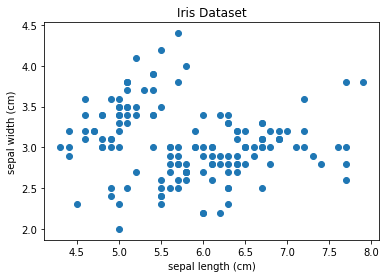

In [89]:
fig, ax = plt.subplots() #figür oluşturuyoruz
ax.scatter(iris['sepal_length'],iris['sepal_width']) # scatter plot yaptırarak yaprak uzunluğu ve genişliğini alıyoruz
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [90]:
colors={'setosa' : 'r', 'versicolor' : 'g', 'virginica' : 'b'}


Text(0, 0.5, 'sepal width (cm)')

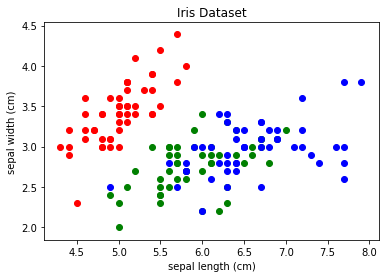

In [91]:
fig, ax = plt.subplots() #Diğer figür 3 türe de hakim ancak tek renk var, çiçeklerin rengine göre plot edelim
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i],iris['sepal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

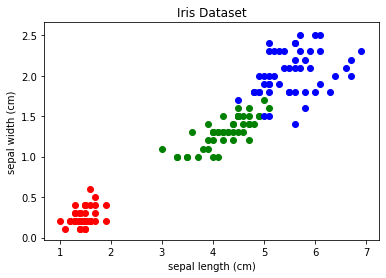

In [92]:
fig, ax = plt.subplots()
for i in range(len(iris['petal_length'])):
    ax.scatter(iris['petal_length'][i],iris['petal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [93]:
columns = iris.columns.drop(['species'])

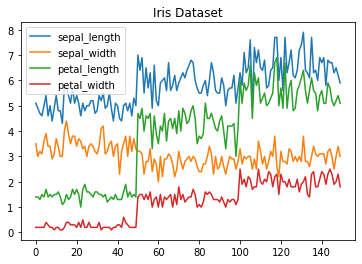

In [94]:
x_data = range (0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend(columns)


In [95]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0, 0.5, 'Count')

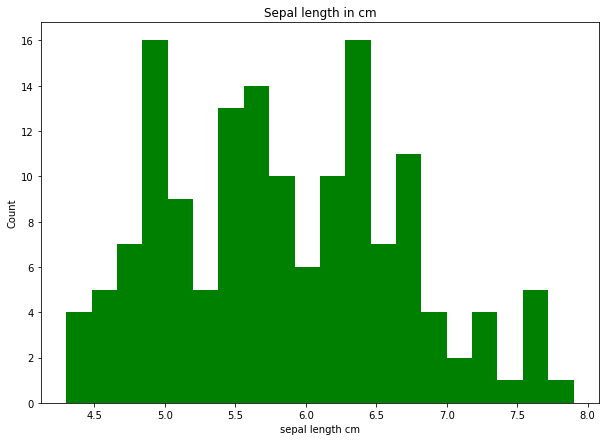

In [96]:
plt.figure(figsize=(10,7))
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

In [97]:
test_array=[3,5,7,8,9,10,11,13,124]
print("mean: " + str(np.mean(test_array)))
print("median: " + str(np.median(test_array)))
#median outlierlara karşı daha robust, mean outlier durumlarına karşı hassas

mean: 21.11111111111111
median: 9.0


In [98]:
# Quetile bulmak:
# elimizdeki veriyi 4 çeyreğe bölüyoruz
test_array=[3,5,7,8,9,10,11,13,124,35,36,23,21,12,13,14,15,60,32,34,1,3,5,8,6,7]

In [99]:
print("1. Quertile %25: " + str(np.percentile(q=25, a=test_array))) 
print("2. Quertile %50: " + str(np.percentile(q=50, a=test_array))) 
print("3. Quertile %75: " + str(np.percentile(q=75, a=test_array))) 
print("4. Quertile %100: " + str(np.percentile(q=100, a=test_array)))
Q3=np.percentile(q=75, a=test_array)
Q1=np.percentile(q=25, a=test_array)
IQR=Q3-Q1
print("IQR (Inter Quertile Range) : " + str(IQR))
outlier=[]
outlier_min=Q1-1.5*IQR
outlier_max=Q3+1.5*IQR
for i in test_array:
    if i<outlier_min or i>outlier_max:
        outlier.append(i)
print("Bu sayıdan küçükse outlier diyebiliriz: " +str(outlier_min))
print("Bu sayıdan büyükse outlier diyebiliriz: " +str(outlier_max))
print(outlier)

1. Quertile %25: 7.0
2. Quertile %50: 11.5
3. Quertile %75: 22.5
4. Quertile %100: 124.0
IQR (Inter Quertile Range) : 15.5
Bu sayıdan küçükse outlier diyebiliriz: -16.25
Bu sayıdan büyükse outlier diyebiliriz: 45.75
[124, 60]


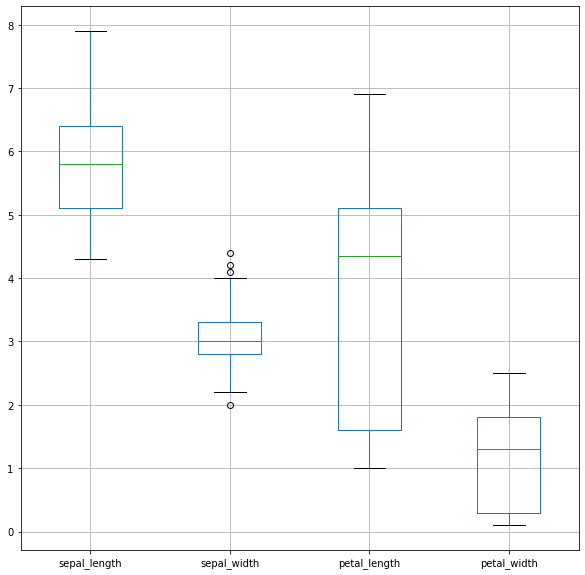

In [100]:
plt.figure(figsize=(10,10))
iris.boxplot()

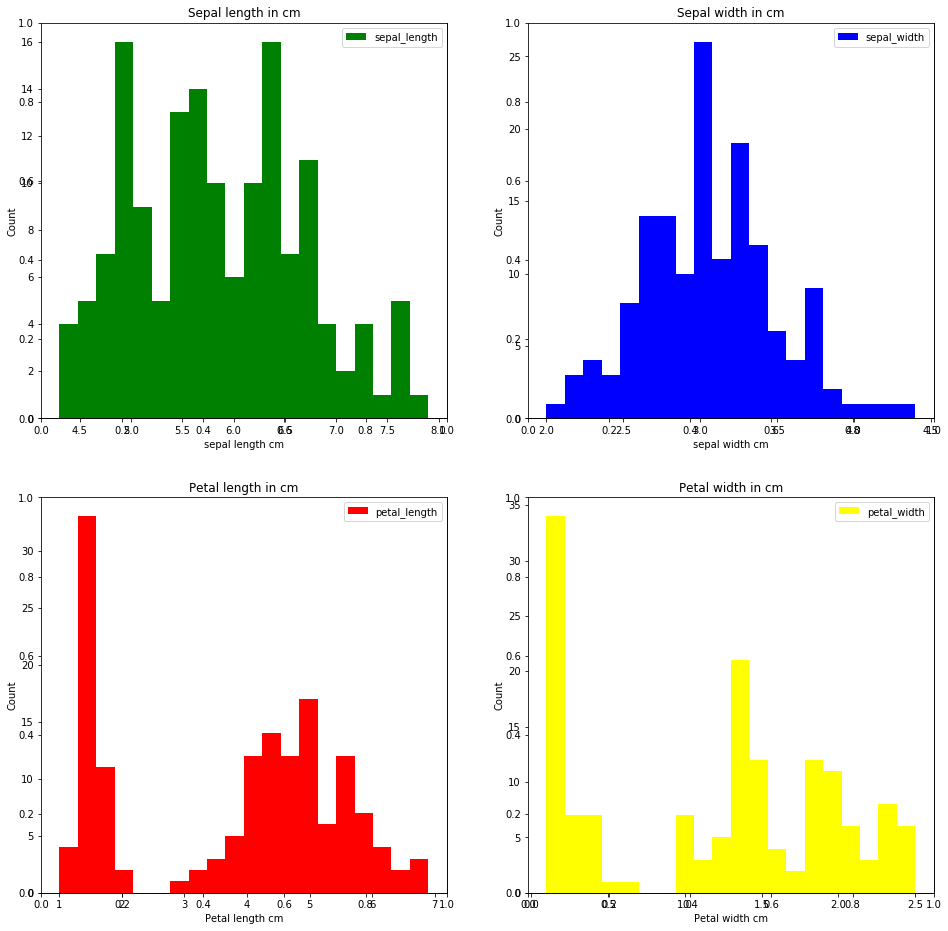

In [101]:
f, axs = plt.subplots(2,2,figsize=(16,16))

ax = f.add_subplot(221)
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.legend([iris.columns[0]])
plt.ylabel("Count")

ax2 = f.add_subplot(222)
plt.hist(iris['sepal_width'],bins=20, color='blue')
plt.title("Sepal width in cm")
plt.xlabel("sepal width cm")
plt.ylabel("Count")
plt.legend([iris.columns[1]])

ax2 = f.add_subplot(223)
plt.hist(iris['petal_length'],bins=20, color='red')
plt.title("Petal length in cm")
plt.xlabel("Petal length cm")
plt.ylabel("Count")
plt.legend([iris.columns[2]])

ax2 = f.add_subplot(224)
plt.hist(iris['petal_width'],bins=20, color='yellow')
plt.title("Petal width in cm")
plt.xlabel("Petal width cm")
plt.ylabel("Count")
plt.legend([iris.columns[3]])

In [102]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [103]:
iris_corr=iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


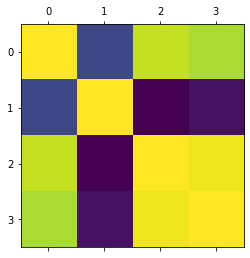

In [104]:
plt.matshow(iris_corr)
plt.show()

In [105]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


In [106]:
grps=pd.unique(iris.species.values)
print(grps)


['setosa' 'versicolor' 'virginica']


sepal_length : 
setosa 0.98 , 0.46
versicolor 0.98 , 0.46
virginica 0.97 , 0.26
 


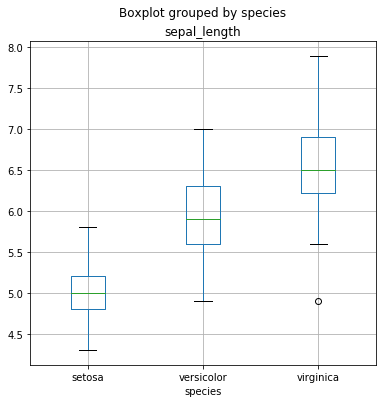

 
sepal_width : 
setosa 0.97 , 0.27
versicolor 0.97 , 0.34
virginica 0.97 , 0.18
 


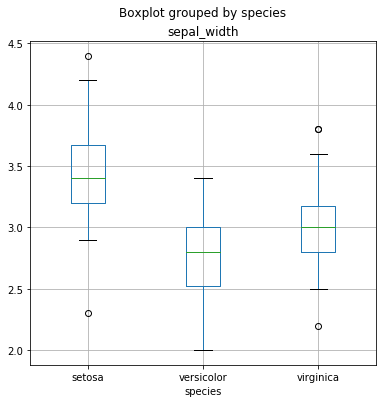

 
petal_length : 
setosa 0.95 , 0.05
versicolor 0.97 , 0.16
virginica 0.96 , 0.11
 


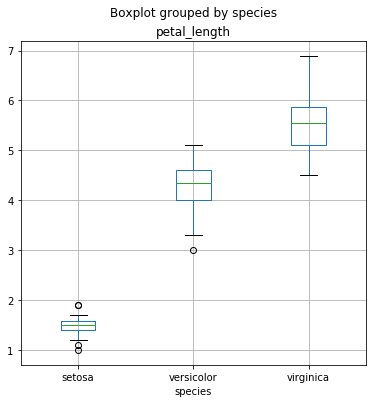

 
petal_width : 
setosa 0.80 , 0.00
versicolor 0.95 , 0.03
virginica 0.96 , 0.09
 


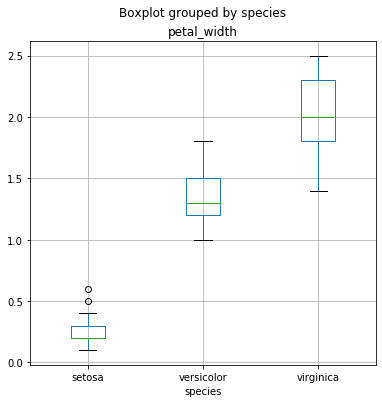

In [107]:
grps=pd.unique(iris.species.values)
for sepal_petal in iris.columns[:-1]:
    print (sepal_petal+" : ")

    for name in grps:
        print(name, "%.2f , %.2f" % shapiro(iris[sepal_petal][iris['species'] == name]))
    print (" ")
    iris.boxplot(column=sepal_petal, by="species",figsize=(6,6))
    plt.show()
    print (" ")

In [108]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [116]:
from scipy.stats import bartlett
for i in iris.columns[:-1]:
    print(i)
    print("   ")
    
    print(bartlett(iris[i][iris['species']  == 'setosa'], 
                   iris[i][iris['species']  == 'versicolor'], 
                   iris[i][iris['species']  == 'virginica']))
    print("   ")

sepal_length
   
BartlettResult(statistic=16.005701874401502, pvalue=0.0003345076070163035)
   
sepal_width
   
BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)
   
petal_length
   
BartlettResult(statistic=55.42250284023702, pvalue=9.229037733034152e-13)
   
petal_width
   
BartlettResult(statistic=39.2131139455632, pvalue=3.0547839321996904e-09)
   


In [117]:
for i in iris.columns[:-1]:
    print(i)
    print("   ")
    
    print(levene(  iris[i][iris['species']  == 'setosa'], 
                   iris[i][iris['species']  == 'versicolor'], 
                   iris[i][iris['species']  == 'virginica']))
    print("   ")

sepal_length
   
LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)
   
sepal_width
   
LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)
   
petal_length
   
LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)
   
petal_width
   
LeveneResult(statistic=19.892438674871457, pvalue=2.260519740405839e-08)
   


In [118]:
for i in iris.columns[:-1]:
    print(i)
    print("   ")
    
    print(f_oneway(iris[i][iris['species']  == 'setosa'], 
                   iris[i][iris['species']  == 'versicolor'], 
                   iris[i][iris['species']  == 'virginica']))
    print("   ")

sepal_length
   
F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)
   
sepal_width
   
F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)
   
petal_length
   
F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)
   
petal_width
   
F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)
   
